In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Question 1

l1 = np.array([[1, 1, -5]])
l2 = np.array([[4, -5, 7]])

x = np.cross(l1, l2)
print(f'x : {x}')

print(f'verification : l1t.x = {np.dot(l1, x.T).squeeze()}, l2t.x = {np.dot(l2, x.T).squeeze()}')
print(x.shape)

x_cart = np.array([val / x[0, -1] for val in x[0, :-1]])
print(f'x_cart : {x_cart}')

x : [[-18 -27  -9]]
verification : l1t.x = 0, l2t.x = 0
(1, 3)
x_cart : [2. 3.]


In [5]:
l1 = np.array([[1, 2, 1]])
l2 = np.array([[3, 6, -2]])

x = np.cross(l1, l2)
print(f'x : {x}')

print(f'verification : l1t.x = {np.dot(l1, x.T).squeeze()}, l2t.x = {np.dot(l2, x.T).squeeze()}')
print(x.shape)

x_cart = np.array([val / x[0, -1] for val in x[0, :-1]])
print(f'x_cart : {x_cart}')

# Dans notre cas le point d'intersection est à l'infini

x : [[-10   5   0]]
verification : l1t.x = 0, l2t.x = 0
(1, 3)
x_cart : [-inf  inf]


C:\Users\Jalil\AppData\Local\Temp\ipykernel_30584\173737274.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  x_cart = np.array([val / x[0, -1] for val in x[0, :-1]])


In [10]:
pt1 = [[1, 3, 1]]
pt2 = [[2, 7, 1]]
l = np.cross(pt1, pt2)


In [11]:
print(l)

[[-4  1  1]]


In [12]:
M = np.array([[0, -1, 0, 2], [1, 0, 0, 5], [0, 0, 1, 4], [0, 0, 0, 1]])
A = np.array([[3, 4, 5, 1]])

In [14]:
print(f'norm : {np.linalg.norm(A)}')
A_transformed = np.dot(M, A.T)
print(f'norm_transformed : {np.linalg.norm(A_transformed)}')

norm : 7.14142842854285
norm_transformed : 12.24744871391589


In [15]:
print(np.identity(4)[])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
"""  r = np.dot(rx, np.dot(ry, rz))
s = scale_factor
M = np.dot(t, np.dot(r, s)) """

In [66]:
def transform_m(angles, translation, scale_factor):

    t = np.identity(n=4)
    s = np.identity(n=4)
    
    
    rx = np.array([[1, 0, 0, 0],
                  [0, np.cos(angles[0]), -np.sin(angles[0]), 0],
                  [0, np.sin(angles[0]), np.cos(angles[0]), 0],
                  [0, 0, 0, 1]])
    
    ry = np.array([[np.cos(angles[1]), 0, np.sin(angles[1]), 0],
                  [0, 1, 0, 0],
                  [-np.sin(angles[1]), 0, np.cos(angles[1]), 0],
                  [0, 0, 0, 1]])
    
    rz = np.array([[np.cos(angles[2]), -np.sin(angles[2]), 0, 0],
                  [np.sin(angles[2]), np.cos(angles[2]), 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    
    for i, val_params in enumerate(zip(angles, translation)):
        trans = val_params[1]
        t[i, -1] = trans
        
        
    
    r = np.dot(rx, np.dot(ry, rz))
    s[:-1, :-1] = s[:-1, :-1]*scale_factor
    
    return np.dot(t, np.dot(r, s))
    



In [67]:
funct([90, 20, 10], [2, 3, 4], scale_factor=10)

array([[ 7.04041031,  0.        ,  4.56472625,  2.        ],
       [ 7.52431594, -8.39071529, -1.60513656,  3.        ],
       [-4.56472625, -5.44021111,  7.04041031,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [68]:
a = np.array([[-0.5, -0.5, 0, 1]])
b = np.array([[-0.5, 0.5, 0, 1]])
c = np.array([[0.5, -0.5, 0, 1]])
d = np.array([[0.5, 0.5, 0, 1]])

In [69]:
pts = [a, b, c, d]
transformed_pts = []
m = transform_m(angles=[45, 0, 45], translation=[0.5, 0.5, 2], scale_factor=2)
for pt in pts:
    transformed_pts.append(np.dot(m, pt.T).T)

In [70]:
print(m)

[[ 1.05064398 -1.70180705  0.          0.5       ]
 [ 0.89399666  0.55192638 -1.70180705  0.5       ]
 [ 1.44807362  0.89399666  1.05064398  2.        ]
 [ 0.          0.          0.          1.        ]]


In [71]:
pts

[array([[-0.5, -0.5,  0. ,  1. ]]),
 array([[-0.5,  0.5,  0. ,  1. ]]),
 array([[ 0.5, -0.5,  0. ,  1. ]]),
 array([[0.5, 0.5, 0. , 1. ]])]

In [72]:
transformed_pts

[array([[ 0.82558154, -0.22296152,  0.82896486,  1.        ]]),
 array([[-0.87622551,  0.32896486,  1.72296152,  1.        ]]),
 array([[1.87622551, 0.67103514, 2.27703848, 1.        ]]),
 array([[0.17441846, 1.22296152, 3.17103514, 1.        ]])]

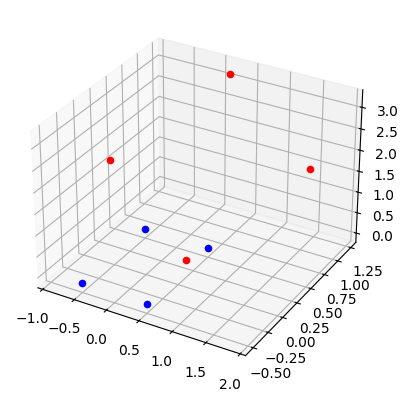

In [74]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pt, transformed_pt in zip(pts, transformed_pts):
    ax.scatter3D(pt[0, 0], pt[0, 1], pt[0, 2], color='blue')
    ax.scatter3D(transformed_pt[0, 0], transformed_pt[0, 1], transformed_pt[0, 2], color='red')
    

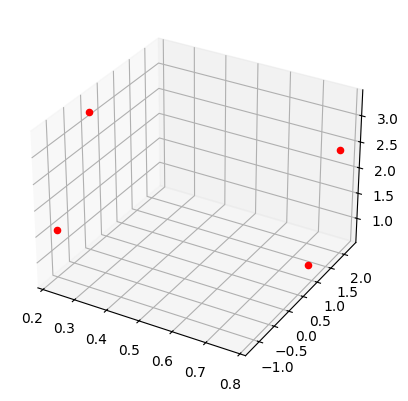

In [61]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pt, transformed_pt in zip(pts, transformed_pts):
